In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_wine
from sklearn.model_selection import learning_curve, validation_curve

In [6]:
wine = load_wine()

In [78]:
data = pd.DataFrame(wine['data'],columns=wine['feature_names'])
data['label'] = wine['target']
display(data.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [103]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
alcohol,1,0.0943969,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.0717472,0.0723432,0.64372,-0.328222
malic_acid,0.0943969,1,0.164045,0.2885,-0.0545751,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.36871,-0.192011,0.437776
ash,0.211545,0.164045,1,0.443367,0.286587,0.12898,0.115077,0.18623,0.00965194,0.258887,-0.0746669,0.00391123,0.223626,-0.0496432
alcalinity_of_ash,-0.310235,0.2885,0.443367,1,-0.0833331,-0.321113,-0.35137,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.0545751,0.286587,-0.0833331,1,0.214401,0.195784,-0.256294,0.236441,0.19995,0.0553982,0.0660039,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.12898,-0.321113,0.214401,1,0.864564,-0.449935,0.612413,-0.0551364,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.35137,0.195784,0.864564,1,-0.5379,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.18623,0.361922,-0.256294,-0.449935,-0.5379,1,-0.365845,0.139057,-0.26264,-0.50327,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.00965194,-0.197327,0.236441,0.612413,0.652692,-0.365845,1,-0.0252499,0.295544,0.519067,0.330417,-0.49913
color_intensity,0.546364,0.248985,0.258887,0.018732,0.19995,-0.0551364,-0.172379,0.139057,-0.0252499,1,-0.521813,-0.428815,0.3161,0.265668


In [83]:
X=wine['data']
Y=wine['target']

In [107]:
Xdata = pd.DataFrame(X,columns = wine['feature_names'])
Xdatacorr = Xdata.corr()
Xdatacorr.style.background_gradient(cmap='coolwarm')


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1,0.0943969,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.0717472,0.0723432,0.64372
malic_acid,0.0943969,1,0.164045,0.2885,-0.0545751,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.36871,-0.192011
ash,0.211545,0.164045,1,0.443367,0.286587,0.12898,0.115077,0.18623,0.00965194,0.258887,-0.0746669,0.00391123,0.223626
alcalinity_of_ash,-0.310235,0.2885,0.443367,1,-0.0833331,-0.321113,-0.35137,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.0545751,0.286587,-0.0833331,1,0.214401,0.195784,-0.256294,0.236441,0.19995,0.0553982,0.0660039,0.393351
total_phenols,0.289101,-0.335167,0.12898,-0.321113,0.214401,1,0.864564,-0.449935,0.612413,-0.0551364,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.35137,0.195784,0.864564,1,-0.5379,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.18623,0.361922,-0.256294,-0.449935,-0.5379,1,-0.365845,0.139057,-0.26264,-0.50327,-0.311385
proanthocyanins,0.136698,-0.220746,0.00965194,-0.197327,0.236441,0.612413,0.652692,-0.365845,1,-0.0252499,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.19995,-0.0551364,-0.172379,0.139057,-0.0252499,1,-0.521813,-0.428815,0.3161


In [108]:
X = (X-X.mean())/X.std()

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0)

In [110]:
print("X_train {}".format(X_train.shape))
print("X_test {}".format(X_test.shape))
print("Y_train {}".format(Y_train.shape))
print("Y_test {}".format(Y_test.shape))

X_train (133, 13)
X_test (45, 13)
Y_train (133,)
Y_test (45,)


In [149]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=35)

In [150]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=35, p=2,
           weights='uniform')

In [151]:
knn.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0,
       2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2,
       1])

In [152]:
knn.score(X_test,Y_test)

0.7777777777777778

In [137]:
from sklearn.model_selection import ShuffleSplit, KFold,cross_val_score
scores = cross_val_score(knn,wine['data'],wine['target'],cv=20)
print("Значения правильности перекрёстной проверки: {}".format(scores))
print("Средняя {}".format(scores.mean()))

Значения правильности перекрёстной проверки: [0.6        0.8        0.5        0.6        0.7        0.8
 0.7        0.5        0.77777778 0.44444444 0.88888889 0.75
 0.75       0.75       0.625      1.         0.75       1.
 0.875      0.85714286]
Средняя 0.7334126984126984


In [141]:
kfold = KFold(n_splits = 20)
print("Значения правильности перекрёстной проверки:\n{}".format(cross_val_score(knn,wine.data,wine.target,cv=kfold)))
print("Средняя {}".format(cross_val_score(knn,wine.data,wine.target,cv=kfold).mean()))

Значения правильности перекрёстной проверки:
[0.88888889 1.         0.55555556 1.         0.55555556 1.
 0.66666667 0.66666667 0.44444444 0.44444444 0.66666667 0.88888889
 0.77777778 0.88888889 0.88888889 0.55555556 0.55555556 0.44444444
 0.75       0.5       ]
Средняя 0.7069444444444445


In [144]:
shuffle_split = ShuffleSplit(test_size=.5,train_size=.5,n_splits=10)
scores = cross_val_score(knn,wine.data,wine.target,cv=shuffle_split)
print("Значения правильнсти перекрёстной проверки:\n {}".format(scores))
print("Средняя {}".format(scores.mean()))

Значения правильнсти перекрёстной проверки:
 [0.71910112 0.68539326 0.71910112 0.68539326 0.60674157 0.70786517
 0.76404494 0.68539326 0.74157303 0.66292135]
Средняя 0.697752808988764


In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [176]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=20, scoring='accuracy')
clf_gs.fit(X_train, Y_train)

C:\Users\MI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [177]:
clf_gs.cv_results_

C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\deprecatio

{'mean_fit_time': array([0.00057307, 0.00068159, 0.00064781, 0.00068941, 0.00067309,
        0.0006258 , 0.00091705, 0.00049723, 0.00073947, 0.00069196]),
 'std_fit_time': array([0.00048872, 0.00045034, 0.00043846, 0.00044117, 0.00045941,
        0.0004614 , 0.0003237 , 0.00050264, 0.00039771, 0.00046128]),
 'mean_score_time': array([0.00095603, 0.00116904, 0.00102669, 0.00117487, 0.00125581,
        0.00114497, 0.00097953, 0.00132138, 0.00120096, 0.00126188]),
 'std_score_time': array([0.00040664, 0.00035593, 0.00050238, 0.00035697, 0.00047493,
        0.00030765, 0.00012164, 0.0004594 , 0.00043953, 0.00043373]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neig

In [178]:
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=35, p=2,
           weights='uniform')

In [179]:
clf_gs.best_score_

0.7218045112781954

In [180]:
clf_gs.best_params_

{'n_neighbors': 35}

C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


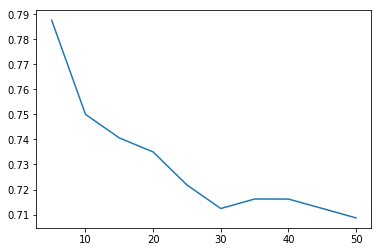

In [155]:
plt.plot(n_range, clf_gs.cv_results_['mean_train_score'])

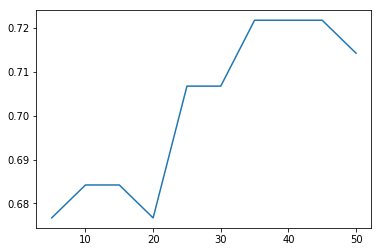

In [156]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

<h3>Кривые валидации</h3>

In [165]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\MI\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

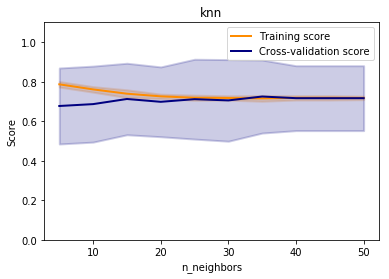

In [166]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      X_train, Y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=20, scoring="accuracy")

<h3>Кривые обучения</h3>

In [171]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\MI\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

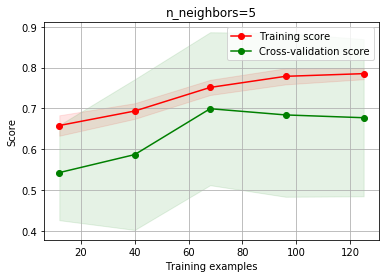

In [182]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    X_train,Y_train, cv=20)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 12, n_neighbors = 35

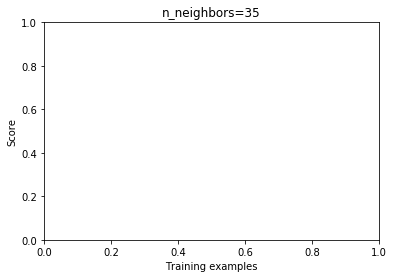

In [190]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=35), 'n_neighbors=35', 
                    X_train,Y_train, cv=
                   )